In [1]:
import scipy.integrate as integrate

def comovingd(z):

    H0=2.18e-18 #Hubble constant in s^-1
    c = 299792458*3.240778849899439e-26 #speed of light Gpc/s

    OmegaM=0.2726   #omega matter, parameter from cosmology
    OmegaL= 0.7274  #omega lambda, parameter from cosmology

    integrand = lambda x : 1/((1+x)**3 * OmegaM + OmegaL)**0.5

    results = integrate.quad(integrand, 0, z)
    inte = results[0]
    dist = c/H0 * inte

    return dist

def looktime(z): #definition of new function looktime. 
# This function takes one argument (redshift z)

    H0=67.2 #Hubble constant in km/s/Mpc
    convert=1e5/3.086e24*3.1536e7*1e9 
    #converts from km/s/Mpc to Gyr (gigayear^-1)

    OmegaM=0.2726   #omega matter, parameter from cosmology
    OmegaL= 0.7274  #omega lambda, parameter from cosmology

    integrand = lambda x: 1./((1.+x)*(OmegaM*(1.+x)**3.+OmegaL)**0.5)
    #integrand is the function I want to integrate between 0 and z, here
    # I'm using the lambda command to briefly define a function inside
    # the looktime function

    ltime=integrate.quad(integrand, 0.0, z)
    # the function integrand is the first argument of integrate.quad
    #ltime is an array of 2 elements. ltime[0]= result of integral
    #ltime[1] error

    look=ltime[0]
    look/=(H0*convert)
    return look #function looktime returns look, which 
    #is the look back time at redshift z in comoving framework


#the main 

z=30.   #initial redshift
codist=[] #comoving distances list
lumdist = [] #luminous distances list
redsh=[] #redshift list
look = [] #lookback time list
while(z>0.0):
    codist.append(comovingd(z)) #call looktime and append result
    redsh.append(z) #store z into list redsh
    lumdist.append(comovingd(z)*(1+z))
    look.append(looktime(z))
    z-=0.1
for i in range(len(codist)): #loop over the elements of look
    print("Redshift:    ", redsh[i],",", "Comoving distance:    ", codist[i], "Gpc,", "Luminous distance:    ", lumdist[i], "Gpc") #prints redshift and 
#corresponding look back time list





istance:     11.159893087234684 Gpc, Luminous distance:     188.60219317426396 Gpc
Redshift:     15.799999999999804 , Comoving distance:     11.14755544633247 Gpc, Luminous distance:     187.27893149838332 Gpc
Redshift:     15.699999999999804 , Comoving distance:     11.135107216049564 Gpc, Luminous distance:     185.95629050802552 Gpc
Redshift:     15.599999999999804 , Comoving distance:     11.12254673509071 Gpc, Luminous distance:     184.6342758025036 Gpc
Redshift:     15.499999999999805 , Comoving distance:     11.10987230703174 Gpc, Luminous distance:     183.31289306602153 Gpc
Redshift:     15.399999999999805 , Comoving distance:     11.097082199359452 Gpc, Luminous distance:     181.99214806949286 Gpc
Redshift:     15.299999999999805 , Comoving distance:     11.084174642479205 Gpc, Luminous distance:     180.67204667240887 Gpc
Redshift:     15.199999999999806 , Comoving distance:     11.071147828689035 Gpc, Luminous distance:     179.35259482476022 Gpc
Redshift:     15.09999999

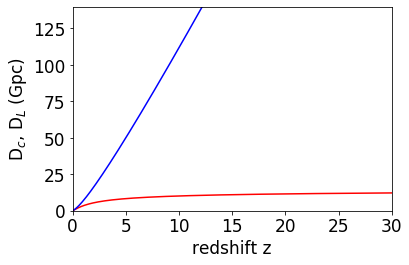

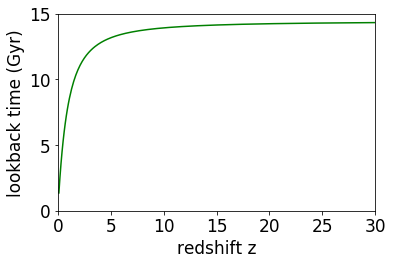

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17}) #set default fontsize to 17

plt.plot(redsh, codist, 'r-')
plt.plot(redsh, lumdist, 'b-')
plt.axis([0, 30, 0, 140])
plt.xlabel('redshift z')
plt.ylabel('D$_c$, D$_L$ (Gpc)')
plt.tight_layout()
plt.show()


plt.plot(redsh, look, "g-")
plt.axis([0, 30, 0, 15])
plt.xlabel('redshift z')
plt.ylabel('lookback time (Gyr)')
plt.tight_layout()
plt.show()